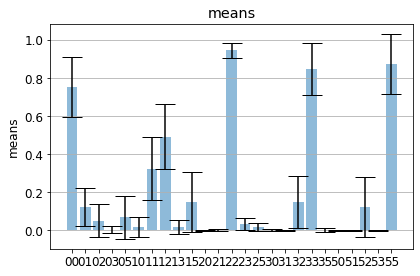

          0         1         2         3         5
0  0.753296  0.015860  0.000499  0.001231  0.000468
1  0.122613  0.324111  0.004180  0.000147  0.000115
2  0.051470  0.492723  0.945547  0.148858  0.125247
3  0.004318  0.018315  0.032691  0.847655  0.000450
5  0.068303  0.148991  0.017083  0.002108  0.873720
<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         5
0  0.158909  0.052571  0.001375  0.004760  0.002768
1  0.101522  0.164827  0.004594  0.001122  0.000872
2  0.085405  0.169302  0.039466  0.134880  0.157631
3  0.018842  0.035036  0.031614  0.136626  0.002663
5  0.111086  0.155662  0.022159  0.011300  0.157973
list of cohens kappa
[0.9334458679593721, 0.663460537547103, 0.38424784761312836, 0.8679602235240813, 0.8399988718411553, 0.8167328106346594, 0.871155038001109, 0.815278297827615, 0.8163078861703245, 0.6743007177285663, 0.8691636835712312, 0.8604286497813155, 0.8650880429314103, 0.8159750022837553, 0.8325232636547539, 0.8774325519681557

<Figure size 432x288 with 0 Axes>

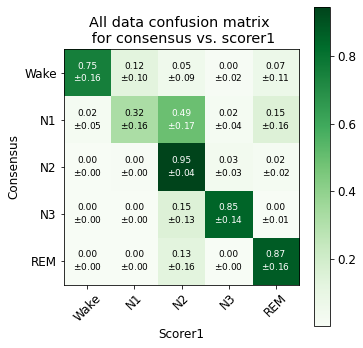

In [2]:
# all data nights in cms and mean of each list for scorer1 and scorer5
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
list_of_nights = [11, 19, 32, 38, 57, 59, 73, 81, 83, 84, 85, 87, 12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]

# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()

# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')


# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('scorer1_'+i+'.txt', delimiter='\t')
# find all negative values
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    

    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'scorer'})

    # makeing confusion matrix for everz night 

    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['scorer']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')
    cmn_night = df_confusion_night

    # append everz cell of confusion matrix to corresponding list
    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)
    df_scorers = df_scorers.append(df_scorer1, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
# counting mean of everz list
mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)


# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)

#making list of means and stds and two more list with labels and classes
means = [mean00, mean01, mean02, mean03, mean05, mean10, mean11, mean12, mean13, mean15, mean20, mean21, mean22, mean23, mean25, mean30, mean31, mean32, mean33, mean35, mean50, mean51, mean52, mean53, mean55, ]
stdevs = [stdev00, stdev01, stdev02, stdev03, stdev05, stdev10, stdev11, stdev12, stdev13, stdev15, stdev20, stdev21, stdev22, stdev23, stdev25, stdev30, stdev31, stdev32, stdev33, stdev35, stdev50, stdev51, stdev52, stdev53, stdev55, ]
labels = ['00', '01', '02', '03', '05', '10', '11', '12', '13', '15', '20', '21', '22', '23', '25', '30', '31', '32', '33', '35', '50', '51', '52', '53', '55', ]
#class_list = ['0','1','2','3','5']
class_list = ['Wake','N1','N2','N3','REM']
x_pos = np.arange(len(labels))

# first plot, which is prettz bad
fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=stdevs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('means')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('means')
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('.png')
plt.show()
#makind and printing dataframe confusion matrrix of means just for us 
DataForConfusionMatrixMeanDataFrame = {'0': [mean00, mean01, mean02, mean03, mean05],
        '1': [mean10, mean11, mean12, mean13, mean15],
        '2': [mean20, mean21, mean22, mean23, mean25],
        '3': [mean30, mean31, mean32, mean33, mean35],
        '5': [mean50, mean51, mean52, mean53, mean55],
        }
ConfusionMatrixMeanDataFrame = pd.DataFrame(DataForConfusionMatrixMeanDataFrame, index=['0','1','2','3','5'])
print (ConfusionMatrixMeanDataFrame)
print (type(ConfusionMatrixMeanDataFrame))


#making and printing dataframe confusion matrrix of std just for us 
DataForConfusionMatrixStDevDataFrame = {'0': [stdev00, stdev01, stdev02, stdev03, stdev05],
        '1': [stdev10, stdev11, stdev12, stdev13, stdev15],
        '2': [stdev20, stdev21, stdev22, stdev23, stdev25],
        '3': [stdev30, stdev31, stdev32, stdev33, stdev35],
        '5': [stdev50, stdev51, stdev52, stdev53, stdev55],
        }
ConfusionMatrixStDevDataFrame = pd.DataFrame(DataForConfusionMatrixStDevDataFrame, index=['0','1','2','3','5'])

print (ConfusionMatrixStDevDataFrame)

DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]

# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
#function for plotting
def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=9,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("All data confusion matrix \n for consensus vs. scorer1")
    plt.rc('font', size=12) 
    plt.ylabel('Consensus')
    plt.xlabel('Scorer1')


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('All_data_uncleaned_scorer5_vs_scorer1.png', bbox_inches='tight')

print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list) 



[0.8317459733905807, 0.07902035717697976, 0.0337806996731888, 0.0012106537530266342, 0.043456491661077894, 0.02496600462126313, 0.5353845592467216, 0.3542401602546713, 0.0, 0.0854092758773439, 0.0009441462552702606, 0.01285018591897726, 0.9785781709995953, 0.0012061400012446408, 0.0063504398686682565, 0.0008839845980597638, 0.0024803637866887144, 0.4606171998477905, 0.535494251173367, 0.0005242005940940067, 0.0015985217351457614, 0.011381839295252412, 0.10705934746138485, 0.0, 0.8630111389658439]
[0.14456863891715008, 0.09324936059248208, 0.06276488981173976, 0.009220064292813447, 0.08137727415912079, 0.0764310682341193, 0.17845088111381424, 0.17106524403788298, 0.0, 0.0997060965127732, 0.002928500029009454, 0.012677122860024148, 0.023482711357692712, 0.0026491278162208234, 0.018285157542016622, 0.004244451550458238, 0.018889887819422673, 0.1526936186632434, 0.14909672129390097, 0.003992192786579019, 0.009637746069849747, 0.031198643354754273, 0.13476756596467482, 0.0, 0.17873558625332

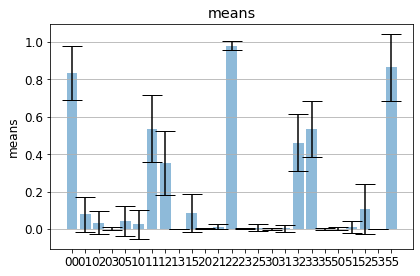

          0         1         2         3         5
0  0.831746  0.024966  0.000944  0.000884  0.001599
1  0.079020  0.535385  0.012850  0.002480  0.011382
2  0.033781  0.354240  0.978578  0.460617  0.107059
3  0.001211  0.000000  0.001206  0.535494  0.000000
5  0.043456  0.085409  0.006350  0.000524  0.863011
<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         5
0  0.144569  0.076431  0.002929  0.004244  0.009638
1  0.093249  0.178451  0.012677  0.018890  0.031199
2  0.062765  0.171065  0.023483  0.152694  0.134768
3  0.009220  0.000000  0.002649  0.149097  0.000000
5  0.081377  0.099706  0.018285  0.003992  0.178736
list of cohens kappa
[0.829598561101837, 0.6546934817523409, 0.43451638111011337, 0.7413275853734136, 0.7994123977988786, 0.8026056315262018, 0.8926046459432162, 0.6043269570127762, 0.8637180436205251, 0.8316629197186163, 0.8567857578344105, 0.8499264662042649, 0.7517869732100892, 0.7392174299688751, 0.8418724842220344, 0.86830597074031

<Figure size 432x288 with 0 Axes>

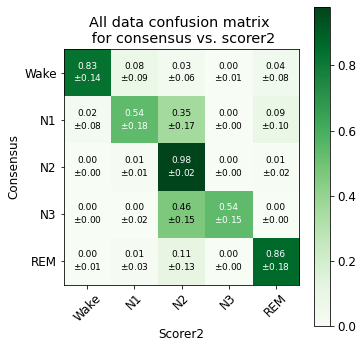

In [5]:
# all data nights in cms and mean of each list for scorer2 and scorer5
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
list_of_nights = [11, 19, 32, 38, 57, 59, 73, 81, 83, 84, 85, 87, 12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]

# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()

# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('scorer2_'+i+'.txt', delimiter='\t')
# find all negative values
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    

    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'scorer'})

    # makeing confusion matrix for everz night 

    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['scorer']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')
    cmn_night = df_confusion_night

    # append everz cell of confusion matrix to corresponding list
    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)
    df_scorers = df_scorers.append(df_scorer1, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
# counting mean of everz list
mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)


# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)



#making list of means and stds and two more list with labels and classes
means = [mean00, mean01, mean02, mean03, mean05, mean10, mean11, mean12, mean13, mean15, mean20, mean21, mean22, mean23, mean25, mean30, mean31, mean32, mean33, mean35, mean50, mean51, mean52, mean53, mean55, ]
stdevs = [stdev00, stdev01, stdev02, stdev03, stdev05, stdev10, stdev11, stdev12, stdev13, stdev15, stdev20, stdev21, stdev22, stdev23, stdev25, stdev30, stdev31, stdev32, stdev33, stdev35, stdev50, stdev51, stdev52, stdev53, stdev55, ]
labels = ['00', '01', '02', '03', '05', '10', '11', '12', '13', '15', '20', '21', '22', '23', '25', '30', '31', '32', '33', '35', '50', '51', '52', '53', '55', ]
#class_list = ['0','1','2','3','5']
class_list = ['Wake','N1','N2','N3','REM']
x_pos = np.arange(len(labels))
print (means)
print (stdevs)
# first plot, which is prettz bad
fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=stdevs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('means')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('means')
ax.yaxis.grid(True)

plt.tight_layout()

plt.show()
#makind and printing dataframe confusion matrrix of means just for us 
DataForConfusionMatrixMeanDataFrame = {'0': [mean00, mean01, mean02, mean03, mean05],
        '1': [mean10, mean11, mean12, mean13, mean15],
        '2': [mean20, mean21, mean22, mean23, mean25],
        '3': [mean30, mean31, mean32, mean33, mean35],
        '5': [mean50, mean51, mean52, mean53, mean55],
        }
ConfusionMatrixMeanDataFrame = pd.DataFrame(DataForConfusionMatrixMeanDataFrame, index=['0','1','2','3','5'])
print (ConfusionMatrixMeanDataFrame)
print (type(ConfusionMatrixMeanDataFrame))


#making and printing dataframe confusion matrrix of std just for us 
DataForConfusionMatrixStDevDataFrame = {'0': [stdev00, stdev01, stdev02, stdev03, stdev05],
        '1': [stdev10, stdev11, stdev12, stdev13, stdev15],
        '2': [stdev20, stdev21, stdev22, stdev23, stdev25],
        '3': [stdev30, stdev31, stdev32, stdev33, stdev35],
        '5': [stdev50, stdev51, stdev52, stdev53, stdev55],
        }
ConfusionMatrixStDevDataFrame = pd.DataFrame(DataForConfusionMatrixStDevDataFrame, index=['0','1','2','3','5'])

print (ConfusionMatrixStDevDataFrame)

DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]

# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
#function for plotting
def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=9,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("All data confusion matrix \n for consensus vs. scorer2")
    plt.rc('font', size=12) 
    plt.ylabel('Consensus')
    plt.xlabel('Scorer2')


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('All_data_uncleaned_scorer5_vs_scorer2.png', bbox_inches='tight')

print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list) 



[0.9291585482648695, 0.0633367588721103, 0.0026038580064003795, 0.0, 0.004900834856619676, 0.25987815073530635, 0.6003023571301739, 0.09609654165204563, 0.0021671834292563575, 0.04155576705321782, 0.009875190541019006, 0.01999510816591624, 0.8430884077690783, 0.061953199965394175, 0.0650880935585922, 0.012338498317064005, 0.007298090776957825, 0.04746540554773462, 0.9262273009862807, 0.006549638996660188, 0.01020942618568503, 0.013621267363334107, 0.004387164976789368, 0.0, 0.9717821414741915]
[0.1022234889689741, 0.10097761973071577, 0.012044981690300457, 0.0, 0.017579463208647558, 0.12512087539255887, 0.16225689365595114, 0.10091838451034081, 0.010294999031982678, 0.05993037037230104, 0.005934692512202002, 0.012285646501207175, 0.06861768302954012, 0.043579055716054485, 0.048196563641630545, 0.01316146489238032, 0.00901347763994632, 0.059523214896557, 0.07118464620980886, 0.025439483806772134, 0.009771913836605617, 0.021843339466790377, 0.010751829295029505, 0.0, 0.028838799368256108

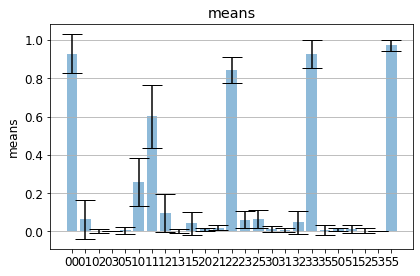

          0         1         2         3         5
0  0.929159  0.259878  0.009875  0.012338  0.010209
1  0.063337  0.600302  0.019995  0.007298  0.013621
2  0.002604  0.096097  0.843088  0.047465  0.004387
3  0.000000  0.002167  0.061953  0.926227  0.000000
5  0.004901  0.041556  0.065088  0.006550  0.971782
<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         5
0  0.102223  0.125121  0.005935  0.013161  0.009772
1  0.100978  0.162257  0.012286  0.009013  0.021843
2  0.012045  0.100918  0.068618  0.059523  0.010752
3  0.000000  0.010295  0.043579  0.071185  0.000000
5  0.017579  0.059930  0.048197  0.025439  0.028839
list of cohens kappa
[0.8921658953389514, 0.6330922044045765, 0.5798919957700133, 0.8474492725637364, 0.8368427543352256, 0.7330207675743383, 0.7935264468330601, 0.823975618158723, 0.8026370345799818, 1.0, 0.7806561002580169, 0.8145097383635729, 0.8152483264520785, 0.729537620296488, 0.787518246293923, 0.8585359935292531, 0.833698263945

<Figure size 432x288 with 0 Axes>

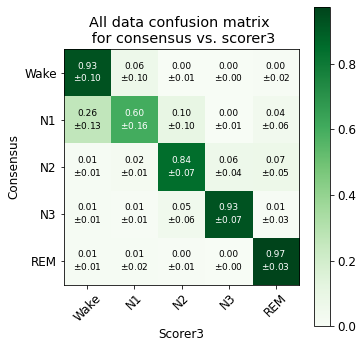

In [6]:
# all data nights in cms and mean of each list for scorer3 and scorer5
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
list_of_nights = [11, 19, 32, 38, 57, 59, 73, 81, 83, 84, 85, 87, 12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]

# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()

# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('scorer3_'+i+'.txt', delimiter='\t')
# find all negative values
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    

    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'scorer'})

    # makeing confusion matrix for everz night 


    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['scorer']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')
    cmn_night = df_confusion_night

    # append everz cell of confusion matrix to corresponding list
    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)
    df_scorers = df_scorers.append(df_scorer1, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
# counting mean of everz list
mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)


# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)



#making list of means and stds and two more list with labels and classes
means = [mean00, mean01, mean02, mean03, mean05, mean10, mean11, mean12, mean13, mean15, mean20, mean21, mean22, mean23, mean25, mean30, mean31, mean32, mean33, mean35, mean50, mean51, mean52, mean53, mean55, ]
stdevs = [stdev00, stdev01, stdev02, stdev03, stdev05, stdev10, stdev11, stdev12, stdev13, stdev15, stdev20, stdev21, stdev22, stdev23, stdev25, stdev30, stdev31, stdev32, stdev33, stdev35, stdev50, stdev51, stdev52, stdev53, stdev55, ]
labels = ['00', '01', '02', '03', '05', '10', '11', '12', '13', '15', '20', '21', '22', '23', '25', '30', '31', '32', '33', '35', '50', '51', '52', '53', '55', ]

class_list = ['Wake','N1','N2','N3','REM']
x_pos = np.arange(len(labels))
print (means)
print (stdevs)
# first plot, which is prettz bad
fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=stdevs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('means')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('means')
ax.yaxis.grid(True)

plt.tight_layout()

plt.show()
#makind and printing dataframe confusion matrrix of means just for us 
DataForConfusionMatrixMeanDataFrame = {'0': [mean00, mean01, mean02, mean03, mean05],
        '1': [mean10, mean11, mean12, mean13, mean15],
        '2': [mean20, mean21, mean22, mean23, mean25],
        '3': [mean30, mean31, mean32, mean33, mean35],
        '5': [mean50, mean51, mean52, mean53, mean55],
        }
ConfusionMatrixMeanDataFrame = pd.DataFrame(DataForConfusionMatrixMeanDataFrame, index=['0','1','2','3','5'])
print (ConfusionMatrixMeanDataFrame)
print (type(ConfusionMatrixMeanDataFrame))

#making and printing dataframe confusion matrrix of std just for us 
DataForConfusionMatrixStDevDataFrame = {'0': [stdev00, stdev01, stdev02, stdev03, stdev05],
        '1': [stdev10, stdev11, stdev12, stdev13, stdev15],
        '2': [stdev20, stdev21, stdev22, stdev23, stdev25],
        '3': [stdev30, stdev31, stdev32, stdev33, stdev35],
        '5': [stdev50, stdev51, stdev52, stdev53, stdev55],
        }
ConfusionMatrixStDevDataFrame = pd.DataFrame(DataForConfusionMatrixStDevDataFrame, index=['0','1','2','3','5'])

print (ConfusionMatrixStDevDataFrame)

#makint arraz for matrix, each list in list correcponds a row
#DataCMMean = [[mean00, mean10, mean20, mean30, mean50], [mean01, mean11, mean21, mean31, mean51], [mean02, mean12, mean22, mean32, mean52], [mean03, mean13, mean23, mean33, mean53], [mean05, mean15, mean25, mean35, mean55]]
#DataCMSTDEV = [[stdev00, stdev10, stdev20, stdev30, stdev50], [stdev01, stdev11, stdev21, stdev31, stdev51], [stdev02, stdev12, stdev22, stdev32, stdev52], [stdev03, stdev13, stdev23, stdev33, stdev53], [stdev05, stdev15, stdev25, stdev35, stdev55]]
DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]

# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
#function for plotting
def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=9,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("All data confusion matrix \n for consensus vs. scorer3")
    plt.rc('font', size=12) 
    plt.ylabel('Consensus')
    plt.xlabel('Scorer3')


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('All_data_uncleaned_scorer5_vs_scorer3.png', bbox_inches='tight')

print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list) 



[0.9783640755269347, 0.013055435936791869, 0.008580488536273356, 0.0, 0.0, 0.467681303744705, 0.4233273184693038, 0.09874438579318408, 0.0038419430703105994, 0.006405048922496579, 0.020503717060608686, 0.01179064488303586, 0.8002369915519216, 0.15671944467010568, 0.010749201834328, 0.018940340745236515, 0.0020997800436316476, 0.0039552232220961495, 0.974870138905366, 0.00013451708366962604, 0.03502392154755237, 0.041614636304766785, 0.08467425730635678, 0.0011575031004547336, 0.8375296817408694]
[0.05522636312032693, 0.04972301939162198, 0.02408417964830578, 0.0, 0.0, 0.11017812598761433, 0.1102571782082513, 0.09511311168936448, 0.014521080432939672, 0.01964409379002807, 0.008517408555718378, 0.005478869699961328, 0.0646610783234439, 0.06113859723036633, 0.011715209887725469, 0.017697937349640445, 0.005598340836037069, 0.007032910397423734, 0.019173356506779538, 0.001024451588090383, 0.021048994943104006, 0.045041004569524805, 0.06256324277816276, 0.00881528098239725, 0.074715878981923

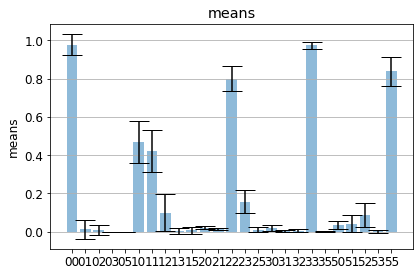

          0         1         2         3         5
0  0.978364  0.467681  0.020504  0.018940  0.035024
1  0.013055  0.423327  0.011791  0.002100  0.041615
2  0.008580  0.098744  0.800237  0.003955  0.084674
3  0.000000  0.003842  0.156719  0.974870  0.001158
5  0.000000  0.006405  0.010749  0.000135  0.837530
<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         5
0  0.055226  0.110178  0.008517  0.017698  0.021049
1  0.049723  0.110257  0.005479  0.005598  0.045041
2  0.024084  0.095113  0.064661  0.007033  0.062563
3  0.000000  0.014521  0.061139  0.019173  0.008815
5  0.000000  0.019644  0.011715  0.001024  0.074716
list of cohens kappa
[0.6226837393295857, 0.7523268361772442, 0.6210948519040903, 0.680777846784386, 0.7613022967476601, 0.7038922435691664, 0.8067130832380754, 0.7571173065458066, 0.7853010806063615, 0.5907226505375716, 0.5743923966159343, 0.7106636599314089, 0.7446338443957718, 0.7642182238587472, 0.7556952979848506, 0.712828492392807

<Figure size 432x288 with 0 Axes>

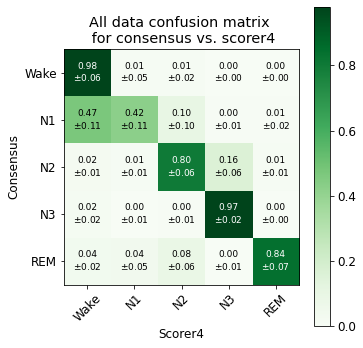

In [7]:
# all data nights in cms and mean of each list for scorer4 and scorer5
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
list_of_nights = [11, 19, 32, 38, 57, 59, 73, 81, 83, 84, 85, 87, 12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]

# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()

# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('scorer4_'+i+'.txt', delimiter='\t')
# find all negative values
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    

    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'scorer'})

    # makeing confusion matrix for everz night 

    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['scorer']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')
    cmn_night = df_confusion_night

    # append everz cell of confusion matrix to corresponding list
    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)
    df_scorers = df_scorers.append(df_scorer1, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
# counting mean of everz list
mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)

# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)



#making list of means and stds and two more list with labels and classes
means = [mean00, mean01, mean02, mean03, mean05, mean10, mean11, mean12, mean13, mean15, mean20, mean21, mean22, mean23, mean25, mean30, mean31, mean32, mean33, mean35, mean50, mean51, mean52, mean53, mean55, ]
stdevs = [stdev00, stdev01, stdev02, stdev03, stdev05, stdev10, stdev11, stdev12, stdev13, stdev15, stdev20, stdev21, stdev22, stdev23, stdev25, stdev30, stdev31, stdev32, stdev33, stdev35, stdev50, stdev51, stdev52, stdev53, stdev55, ]
labels = ['00', '01', '02', '03', '05', '10', '11', '12', '13', '15', '20', '21', '22', '23', '25', '30', '31', '32', '33', '35', '50', '51', '52', '53', '55', ]
#class_list = ['0','1','2','3','5']
class_list = ['Wake','N1','N2','N3','REM']
x_pos = np.arange(len(labels))
print (means)
print (stdevs)
# first plot, which is prettz bad
fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=stdevs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('means')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('means')
ax.yaxis.grid(True)

plt.tight_layout()

plt.show()
#makind and printing dataframe confusion matrrix of means just for us 
DataForConfusionMatrixMeanDataFrame = {'0': [mean00, mean01, mean02, mean03, mean05],
        '1': [mean10, mean11, mean12, mean13, mean15],
        '2': [mean20, mean21, mean22, mean23, mean25],
        '3': [mean30, mean31, mean32, mean33, mean35],
        '5': [mean50, mean51, mean52, mean53, mean55],
        }
ConfusionMatrixMeanDataFrame = pd.DataFrame(DataForConfusionMatrixMeanDataFrame, index=['0','1','2','3','5'])
print (ConfusionMatrixMeanDataFrame)
print (type(ConfusionMatrixMeanDataFrame))

#making and printing dataframe confusion matrrix of std just for us 
DataForConfusionMatrixStDevDataFrame = {'0': [stdev00, stdev01, stdev02, stdev03, stdev05],
        '1': [stdev10, stdev11, stdev12, stdev13, stdev15],
        '2': [stdev20, stdev21, stdev22, stdev23, stdev25],
        '3': [stdev30, stdev31, stdev32, stdev33, stdev35],
        '5': [stdev50, stdev51, stdev52, stdev53, stdev55],
        }
ConfusionMatrixStDevDataFrame = pd.DataFrame(DataForConfusionMatrixStDevDataFrame, index=['0','1','2','3','5'])

print (ConfusionMatrixStDevDataFrame)

DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]

# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
#function for plotting
def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=9,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("All data confusion matrix \n for consensus vs. scorer4")
    plt.rc('font', size=12) 
    plt.ylabel('Consensus')
    plt.xlabel('Scorer4')


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('All_data_uncleaned_scorer5_vs_scorer4.png', bbox_inches='tight')

print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list) 



[0.7737550590285515, 0.166396228889486, 0.026263480109633957, 0.007692307692307693, 0.025892924280021053, 0.01401773125911057, 0.3213755871494578, 0.4498208609230726, 0.039646274453576685, 0.17513954621478234, 0.00014486455164421265, 0.0024986930741081647, 0.9367895858918784, 0.03461825517232237, 0.025948601310046806, 0.0009861932938856016, 0.0, 0.13611390948821558, 0.8543579237274717, 0.008541973490427098, 0.0, 0.0, 0.1496601210489668, 0.0, 0.8503398789510332]
[0.1122340958193694, 0.10518740984793332, 0.03680611208533458, 0.02664693550105965, 0.043193283065487295, 0.02724982502460357, 0.15458838199348487, 0.13806075901972664, 0.059675931048073116, 0.1917349204637293, 0.0005018255273269237, 0.003242535078134084, 0.040266855651373626, 0.023202430296592733, 0.038100966059432056, 0.0034162737821871346, 0.0, 0.1237372039637529, 0.13565267296976705, 0.022650820282489364, 0.0, 0.0, 0.254898152825446, 0.0, 0.254898152825446]


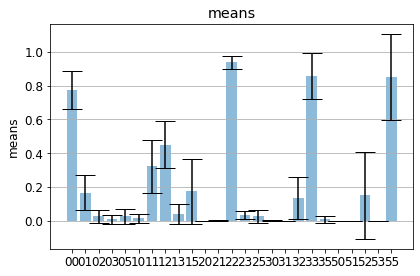

          0         1         2         3        5
0  0.773755  0.014018  0.000145  0.000986  0.00000
1  0.166396  0.321376  0.002499  0.000000  0.00000
2  0.026263  0.449821  0.936790  0.136114  0.14966
3  0.007692  0.039646  0.034618  0.854358  0.00000
5  0.025893  0.175140  0.025949  0.008542  0.85034
<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         5
0  0.112234  0.027250  0.000502  0.003416  0.000000
1  0.105187  0.154588  0.003243  0.000000  0.000000
2  0.036806  0.138061  0.040267  0.123737  0.254898
3  0.026647  0.059676  0.023202  0.135653  0.000000
5  0.043193  0.191735  0.038101  0.022651  0.254898
list of cohens kappa
[0.9334458679593721, 0.663460537547103, 0.38424784761312836, 0.8679602235240813, 0.8399988718411553, 0.8167328106346594, 0.815278297827615, 0.8163078861703245, 0.8691636835712312, 0.6915937182779005, 0.8604286497813155, 0.8813489353078487, 0.871155038001109]
mean of cohens kappa list is  0.7931632590812956
stdev of cohens

<Figure size 432x288 with 0 Axes>

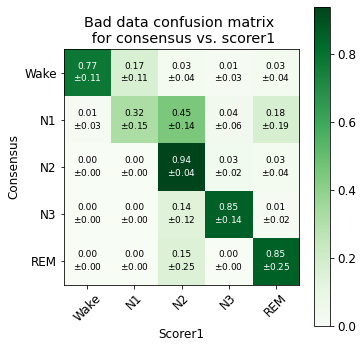

In [8]:
# bad data nights in cms and mean of each list for scorer1 and scorer5
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
list_of_nights = [11, 19, 32, 38, 57, 59,  81, 83, 85, 86, 87, 70, 73]
# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()

# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('scorer1_'+i+'.txt', delimiter='\t')
# find all negative values
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    

    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'scorer'})

    # makeing confusion matrix for everz night 

    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['scorer']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')
    cmn_night = df_confusion_night

    # append everz cell of confusion matrix to corresponding list
    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)
    df_scorers = df_scorers.append(df_scorer1, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
# counting mean of everz list
mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)


# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)



#making list of means and stds and two more list with labels and classes
means = [mean00, mean01, mean02, mean03, mean05, mean10, mean11, mean12, mean13, mean15, mean20, mean21, mean22, mean23, mean25, mean30, mean31, mean32, mean33, mean35, mean50, mean51, mean52, mean53, mean55, ]
stdevs = [stdev00, stdev01, stdev02, stdev03, stdev05, stdev10, stdev11, stdev12, stdev13, stdev15, stdev20, stdev21, stdev22, stdev23, stdev25, stdev30, stdev31, stdev32, stdev33, stdev35, stdev50, stdev51, stdev52, stdev53, stdev55, ]
labels = ['00', '01', '02', '03', '05', '10', '11', '12', '13', '15', '20', '21', '22', '23', '25', '30', '31', '32', '33', '35', '50', '51', '52', '53', '55', ]

class_list = ['Wake','N1','N2','N3','REM']
x_pos = np.arange(len(labels))
print (means)
print (stdevs)
# first plot, which is prettz bad
fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=stdevs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('means')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('means')
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('.png')
plt.show()
#makind and printing dataframe confusion matrrix of means just for us 
DataForConfusionMatrixMeanDataFrame = {'0': [mean00, mean01, mean02, mean03, mean05],
        '1': [mean10, mean11, mean12, mean13, mean15],
        '2': [mean20, mean21, mean22, mean23, mean25],
        '3': [mean30, mean31, mean32, mean33, mean35],
        '5': [mean50, mean51, mean52, mean53, mean55],
        }
ConfusionMatrixMeanDataFrame = pd.DataFrame(DataForConfusionMatrixMeanDataFrame, index=['0','1','2','3','5'])
print (ConfusionMatrixMeanDataFrame)
print (type(ConfusionMatrixMeanDataFrame))


#making and printing dataframe confusion matrrix of std just for us 
DataForConfusionMatrixStDevDataFrame = {'0': [stdev00, stdev01, stdev02, stdev03, stdev05],
        '1': [stdev10, stdev11, stdev12, stdev13, stdev15],
        '2': [stdev20, stdev21, stdev22, stdev23, stdev25],
        '3': [stdev30, stdev31, stdev32, stdev33, stdev35],
        '5': [stdev50, stdev51, stdev52, stdev53, stdev55],
        }
ConfusionMatrixStDevDataFrame = pd.DataFrame(DataForConfusionMatrixStDevDataFrame, index=['0','1','2','3','5'])

print (ConfusionMatrixStDevDataFrame)

DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]

# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
#function for plotting
def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=9,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Bad data confusion matrix \n for consensus vs. scorer1")
    plt.rc('font', size=12) 
    plt.ylabel('Consensus')
    plt.xlabel('Scorer1')


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('bad_data_uncleaned_scorer5_vs_scorer1.png', bbox_inches='tight')

print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list) 



[0.8904911944722064, 0.06929046307620049, 0.023882527728681578, 0.0, 0.016335814722911495, 0.058870241269991616, 0.5359122278215256, 0.32182700055808255, 0.0, 0.08339053035040031, 0.0015853716101287992, 0.013827272161235117, 0.9676759307328864, 0.0018389652048476598, 0.015072460290902059, 0.0006993006993006993, 0.0, 0.4467128804078154, 0.5502087546581496, 0.002379064234734338, 0.005649717514124294, 0.02539945357656311, 0.136658708055242, 0.0, 0.8322921208540706]
[0.09477611934870864, 0.0931142288733366, 0.03115085383114013, 0.0, 0.03934522071560479, 0.13114845696948957, 0.24996959182387835, 0.22320573364661997, 0.0, 0.09923973339530422, 0.004973449413442199, 0.01668356092239804, 0.03775131301527635, 0.002498963501830337, 0.03447280790596321, 0.002422448681914514, 0.0, 0.10737213553600435, 0.10761577477905102, 0.008241320258059688, 0.01957119556575003, 0.0490324694765238, 0.22200484425606937, 0.0, 0.22053812086611524]


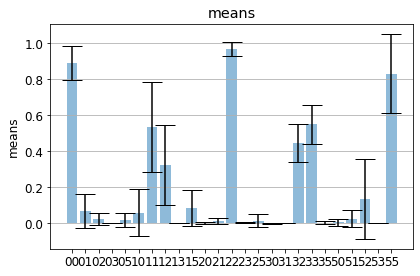

          0         1         2         3         5
0  0.890491  0.058870  0.001585  0.000699  0.005650
1  0.069290  0.535912  0.013827  0.000000  0.025399
2  0.023883  0.321827  0.967676  0.446713  0.136659
3  0.000000  0.000000  0.001839  0.550209  0.000000
5  0.016336  0.083391  0.015072  0.002379  0.832292
<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         5
0  0.094776  0.131148  0.004973  0.002422  0.019571
1  0.093114  0.249970  0.016684  0.000000  0.049032
2  0.031151  0.223206  0.037751  0.107372  0.222005
3  0.000000  0.000000  0.002499  0.107616  0.000000
5  0.039345  0.099240  0.034473  0.008241  0.220538
list of cohens kappa
[0.829598561101837, 0.6546934817523409, 0.43451638111011337, 0.7413275853734136, 0.7994123977988786, 0.8026056315262018, 0.6043269570127762, 0.8637180436205251, 0.8567857578344105, 0.7901669245662428, 0.8499264662042649, 0.8194281963464277, 0.8926046459432162]
mean of cohens kappa list is  0.7645470023223576
stdev o

<Figure size 432x288 with 0 Axes>

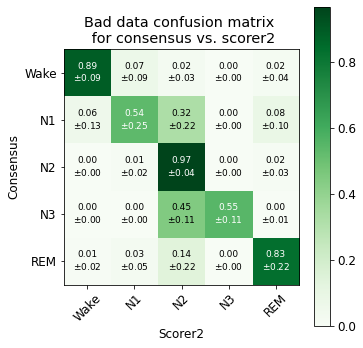

In [9]:
# bad data nights in cms and mean of each list for scorer2 and scorer5
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
list_of_nights = [11, 19, 32, 38, 57, 59,  81, 83, 85, 86, 87, 70, 73]
# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()

# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('scorer2_'+i+'.txt', delimiter='\t')
# find all negative values
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    

    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'scorer'})

    # makeing confusion matrix for everz night 


    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['scorer']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')
    cmn_night = df_confusion_night


    # append everz cell of confusion matrix to corresponding list
    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)
    df_scorers = df_scorers.append(df_scorer1, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
# counting mean of everz list
mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)


# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)


#making list of means and stds and two more list with labels and classes
means = [mean00, mean01, mean02, mean03, mean05, mean10, mean11, mean12, mean13, mean15, mean20, mean21, mean22, mean23, mean25, mean30, mean31, mean32, mean33, mean35, mean50, mean51, mean52, mean53, mean55, ]
stdevs = [stdev00, stdev01, stdev02, stdev03, stdev05, stdev10, stdev11, stdev12, stdev13, stdev15, stdev20, stdev21, stdev22, stdev23, stdev25, stdev30, stdev31, stdev32, stdev33, stdev35, stdev50, stdev51, stdev52, stdev53, stdev55, ]
labels = ['00', '01', '02', '03', '05', '10', '11', '12', '13', '15', '20', '21', '22', '23', '25', '30', '31', '32', '33', '35', '50', '51', '52', '53', '55', ]

class_list = ['Wake','N1','N2','N3','REM']
x_pos = np.arange(len(labels))
print (means)
print (stdevs)
# first plot, which is prettz bad
fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=stdevs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('means')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('means')
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('.png')
plt.show()
#makind and printing dataframe confusion matrrix of means just for us 
DataForConfusionMatrixMeanDataFrame = {'0': [mean00, mean01, mean02, mean03, mean05],
        '1': [mean10, mean11, mean12, mean13, mean15],
        '2': [mean20, mean21, mean22, mean23, mean25],
        '3': [mean30, mean31, mean32, mean33, mean35],
        '5': [mean50, mean51, mean52, mean53, mean55],
        }
ConfusionMatrixMeanDataFrame = pd.DataFrame(DataForConfusionMatrixMeanDataFrame, index=['0','1','2','3','5'])
print (ConfusionMatrixMeanDataFrame)
print (type(ConfusionMatrixMeanDataFrame))


#making and printing dataframe confusion matrrix of std just for us 
DataForConfusionMatrixStDevDataFrame = {'0': [stdev00, stdev01, stdev02, stdev03, stdev05],
        '1': [stdev10, stdev11, stdev12, stdev13, stdev15],
        '2': [stdev20, stdev21, stdev22, stdev23, stdev25],
        '3': [stdev30, stdev31, stdev32, stdev33, stdev35],
        '5': [stdev50, stdev51, stdev52, stdev53, stdev55],
        }
ConfusionMatrixStDevDataFrame = pd.DataFrame(DataForConfusionMatrixStDevDataFrame, index=['0','1','2','3','5'])

print (ConfusionMatrixStDevDataFrame)

DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]

# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
#function for plotting
def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=9,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Bad data confusion matrix \n for consensus vs. scorer2")
    plt.rc('font', size=12) 
    plt.ylabel('Consensus')
    plt.xlabel('Scorer2')


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('bad_data_uncleaned_scorer5_vs_scorer2.png', bbox_inches='tight')

print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list) 



[0.8773519973271834, 0.10773363664182524, 0.007921359037984348, 0.0, 0.006993006993006993, 0.25047047356480373, 0.5928974860326542, 0.08146465046410502, 0.006330680813439434, 0.06883670912499748, 0.011480573424348063, 0.02116395215606015, 0.8264628284244353, 0.06801251588802648, 0.07288013010712993, 0.012970142212655427, 0.006728122965236367, 0.03737094272232385, 0.9429307920997841, 0.0, 0.013760993954485339, 0.01329682282652666, 0.008167872175869046, 0.0, 0.9647743110431191]
[0.13662515472190387, 0.13236320990290815, 0.019267145748902443, 0.0, 0.02422448681914514, 0.13311569220451555, 0.12377796082023655, 0.08741249755443949, 0.018424508326280457, 0.06304180928493983, 0.007141460174029701, 0.012130800779122914, 0.07224937323020841, 0.043574209633686356, 0.055596094448810314, 0.013763237794132625, 0.007758008712747681, 0.03548243841020937, 0.0378666456577246, 0.0, 0.013767614351568189, 0.01422383040594637, 0.01620728489176886, 0.0, 0.031998889697211846]


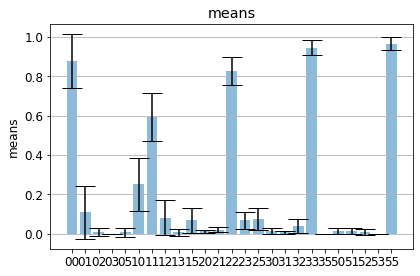

          0         1         2         3         5
0  0.877352  0.250470  0.011481  0.012970  0.013761
1  0.107734  0.592897  0.021164  0.006728  0.013297
2  0.007921  0.081465  0.826463  0.037371  0.008168
3  0.000000  0.006331  0.068013  0.942931  0.000000
5  0.006993  0.068837  0.072880  0.000000  0.964774
<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         5
0  0.136625  0.133116  0.007141  0.013763  0.013768
1  0.132363  0.123778  0.012131  0.007758  0.014224
2  0.019267  0.087412  0.072249  0.035482  0.016207
3  0.000000  0.018425  0.043574  0.037867  0.000000
5  0.024224  0.063042  0.055596  0.000000  0.031999
list of cohens kappa
[0.8921658953389514, 0.6330922044045765, 0.5798919957700133, 0.8474492725637364, 0.8368427543352256, 0.7330207675743383, 0.823975618158723, 0.8026370345799818, 0.7806561002580169, 0.7682352050751013, 0.8145097383635729, 0.7623096191468743, 0.7935264468330601]
mean of cohens kappa list is  0.7744855886463208
stdev of

<Figure size 432x288 with 0 Axes>

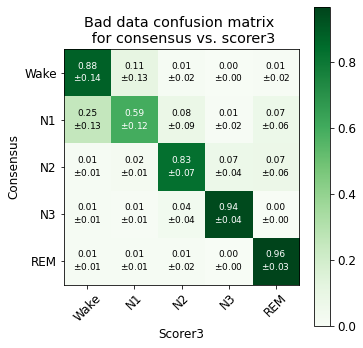

In [10]:
# bad data nights in cms and mean of each list for scorer3 and scorer5
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
list_of_nights = [11, 19, 32, 38, 57, 59,  81, 83, 85, 86, 87, 70, 73]
# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()

# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('scorer3_'+i+'.txt', delimiter='\t')
# find all negative values
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    

    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'scorer'})

    # makeing confusion matrix for everz night 


    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['scorer']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')
    cmn_night = df_confusion_night

    # append everz cell of confusion matrix to corresponding list
    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)
    df_scorers = df_scorers.append(df_scorer1, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
# counting mean of everz list
mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)


# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)



#making list of means and stds and two more list with labels and classes
means = [mean00, mean01, mean02, mean03, mean05, mean10, mean11, mean12, mean13, mean15, mean20, mean21, mean22, mean23, mean25, mean30, mean31, mean32, mean33, mean35, mean50, mean51, mean52, mean53, mean55, ]
stdevs = [stdev00, stdev01, stdev02, stdev03, stdev05, stdev10, stdev11, stdev12, stdev13, stdev15, stdev20, stdev21, stdev22, stdev23, stdev25, stdev30, stdev31, stdev32, stdev33, stdev35, stdev50, stdev51, stdev52, stdev53, stdev55, ]
labels = ['00', '01', '02', '03', '05', '10', '11', '12', '13', '15', '20', '21', '22', '23', '25', '30', '31', '32', '33', '35', '50', '51', '52', '53', '55', ]
class_list = ['Wake','N1','N2','N3','REM']
x_pos = np.arange(len(labels))
print (means)
print (stdevs)
# first plot, which is prettz bad
fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=stdevs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('means')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('means')
ax.yaxis.grid(True)

plt.tight_layout()

plt.show()
#makind and printing dataframe confusion matrrix of means just for us 
DataForConfusionMatrixMeanDataFrame = {'0': [mean00, mean01, mean02, mean03, mean05],
        '1': [mean10, mean11, mean12, mean13, mean15],
        '2': [mean20, mean21, mean22, mean23, mean25],
        '3': [mean30, mean31, mean32, mean33, mean35],
        '5': [mean50, mean51, mean52, mean53, mean55],
        }
ConfusionMatrixMeanDataFrame = pd.DataFrame(DataForConfusionMatrixMeanDataFrame, index=['0','1','2','3','5'])
print (ConfusionMatrixMeanDataFrame)
print (type(ConfusionMatrixMeanDataFrame))


#making and printing dataframe confusion matrrix of std just for us 
DataForConfusionMatrixStDevDataFrame = {'0': [stdev00, stdev01, stdev02, stdev03, stdev05],
        '1': [stdev10, stdev11, stdev12, stdev13, stdev15],
        '2': [stdev20, stdev21, stdev22, stdev23, stdev25],
        '3': [stdev30, stdev31, stdev32, stdev33, stdev35],
        '5': [stdev50, stdev51, stdev52, stdev53, stdev55],
        }
ConfusionMatrixStDevDataFrame = pd.DataFrame(DataForConfusionMatrixStDevDataFrame, index=['0','1','2','3','5'])

print (ConfusionMatrixStDevDataFrame)

DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]

# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
#function for plotting
def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=9,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Bad data confusion matrix \n for consensus vs. scorer3")
    plt.rc('font', size=12) 
    plt.ylabel('Consensus')
    plt.xlabel('Scorer3')


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('bad_data_uncleaned_scorer5_vs_scorer3.png', bbox_inches='tight')

print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list) 



[0.9530657748049052, 0.022564102564102566, 0.024370122630992194, 0.0, 0.0, 0.4348182316340977, 0.40365881580431845, 0.13227435126430093, 0.015915119363395226, 0.013333481933887614, 0.026247997311659853, 0.013527060509517687, 0.7646694872947014, 0.16663450707965505, 0.028920947804465927, 0.01951733297887144, 0.007284382284382284, 0.022697410088369643, 0.9481698723173744, 0.002331002331002331, 0.034098085294328194, 0.05231106816119348, 0.12925803015826237, 0.009178321678321678, 0.7751544947078943]
[0.11129705833260597, 0.0531753082946286, 0.06377890468564539, 0.0, 0.0, 0.08529812859478829, 0.16364249796093802, 0.10155985287002564, 0.05513159069184755, 0.024975936185908557, 0.016710548529811037, 0.009147332329571831, 0.10177056217190956, 0.07744759165466775, 0.05146167870185431, 0.0181683237219695, 0.015120353267613733, 0.06098110214389402, 0.08938155991748281, 0.008074828939715045, 0.025555326307954693, 0.08052983119904485, 0.13834244125513873, 0.03179463895012799, 0.16994582051055043]


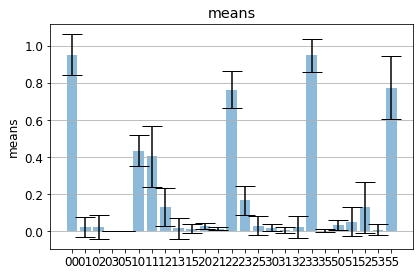

          0         1         2         3         5
0  0.953066  0.434818  0.026248  0.019517  0.034098
1  0.022564  0.403659  0.013527  0.007284  0.052311
2  0.024370  0.132274  0.764669  0.022697  0.129258
3  0.000000  0.015915  0.166635  0.948170  0.009178
5  0.000000  0.013333  0.028921  0.002331  0.775154
<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         5
0  0.111297  0.085298  0.016711  0.018168  0.025555
1  0.053175  0.163642  0.009147  0.015120  0.080530
2  0.063779  0.101560  0.101771  0.060981  0.138342
3  0.000000  0.055132  0.077448  0.089382  0.031795
5  0.000000  0.024976  0.051462  0.008075  0.169946
list of cohens kappa
[0.6226837393295857, 0.7523268361772442, 0.6210948519040903, 0.680777846784386, 0.7613022967476601, 0.7038922435691664, 0.7571173065458066, 0.7853010806063615, 0.5743923966159343, 0.6486718566110767, 0.7106636599314089, 0.1830526424846608, 0.8067130832380754]
mean of cohens kappa list is  0.6621530646573428
stdev of

<Figure size 432x288 with 0 Axes>

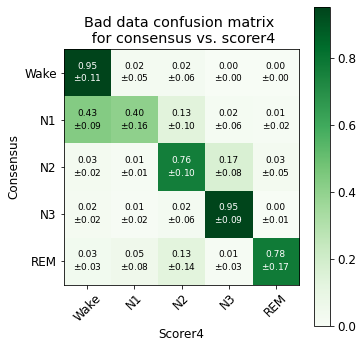

In [11]:
# bad data nights in cms and mean of each list for scorer4 and scorer5
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
list_of_nights = [11, 19, 32, 38, 57, 59,  81, 83, 85, 86, 87, 70, 73]
# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()

# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')


# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('scorer4_'+i+'.txt', delimiter='\t')
# find all negative values
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    

    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'scorer'})

    # makeing confusion matrix for everz night 


    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['scorer']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')
    cmn_night = df_confusion_night


    # append everz cell of confusion matrix to corresponding list
    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)
    df_scorers = df_scorers.append(df_scorer1, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
# counting mean of everz list
mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)


# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)



#making list of means and stds and two more list with labels and classes
means = [mean00, mean01, mean02, mean03, mean05, mean10, mean11, mean12, mean13, mean15, mean20, mean21, mean22, mean23, mean25, mean30, mean31, mean32, mean33, mean35, mean50, mean51, mean52, mean53, mean55, ]
stdevs = [stdev00, stdev01, stdev02, stdev03, stdev05, stdev10, stdev11, stdev12, stdev13, stdev15, stdev20, stdev21, stdev22, stdev23, stdev25, stdev30, stdev31, stdev32, stdev33, stdev35, stdev50, stdev51, stdev52, stdev53, stdev55, ]
labels = ['00', '01', '02', '03', '05', '10', '11', '12', '13', '15', '20', '21', '22', '23', '25', '30', '31', '32', '33', '35', '50', '51', '52', '53', '55', ]

class_list = ['Wake','N1','N2','N3','REM']
x_pos = np.arange(len(labels))
print (means)
print (stdevs)
# first plot, which is prettz bad
fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=stdevs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('means')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('means')
ax.yaxis.grid(True)

plt.tight_layout()

plt.show()
#makind and printing dataframe confusion matrrix of means just for us 
DataForConfusionMatrixMeanDataFrame = {'0': [mean00, mean01, mean02, mean03, mean05],
        '1': [mean10, mean11, mean12, mean13, mean15],
        '2': [mean20, mean21, mean22, mean23, mean25],
        '3': [mean30, mean31, mean32, mean33, mean35],
        '5': [mean50, mean51, mean52, mean53, mean55],
        }
ConfusionMatrixMeanDataFrame = pd.DataFrame(DataForConfusionMatrixMeanDataFrame, index=['0','1','2','3','5'])
print (ConfusionMatrixMeanDataFrame)
print (type(ConfusionMatrixMeanDataFrame))


#making and printing dataframe confusion matrrix of std just for us 
DataForConfusionMatrixStDevDataFrame = {'0': [stdev00, stdev01, stdev02, stdev03, stdev05],
        '1': [stdev10, stdev11, stdev12, stdev13, stdev15],
        '2': [stdev20, stdev21, stdev22, stdev23, stdev25],
        '3': [stdev30, stdev31, stdev32, stdev33, stdev35],
        '5': [stdev50, stdev51, stdev52, stdev53, stdev55],
        }
ConfusionMatrixStDevDataFrame = pd.DataFrame(DataForConfusionMatrixStDevDataFrame, index=['0','1','2','3','5'])

print (ConfusionMatrixStDevDataFrame)

DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]

# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
#function for plotting
def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=9,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Bad data confusion matrix \n for consensus vs. scorer4")
    plt.rc('font', size=12) 
    plt.ylabel('Consensus')
    plt.xlabel('Scorer4')


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('bad_data_uncleaned_scorer5_vs_scorer4.png', bbox_inches='tight')

print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list) 



[0.7589983841104008, 0.11183582371250461, 0.05240646240213142, 0.0033643892339544515, 0.07339494054100879, 0.0163809006382242, 0.3269445922001464, 0.497638918527952, 0.01776003186495317, 0.14127555676872414, 0.000599472402091246, 0.004518554012451937, 0.9490531850416601, 0.03062854486390935, 0.015200243679887333, 0.0013001304893599074, 0.0001890359168241966, 0.15131986517777152, 0.8469011133435808, 0.0002898550724637681, 0.0006005045966682796, 0.00014688601645123384, 0.11951662468238819, 0.00015309246785058175, 0.8795828922366415]
[0.1564199426661776, 0.09874133891419094, 0.08480610111857294, 0.015829118719847855, 0.11791357100005474, 0.057737976285898815, 0.16784830102597278, 0.16703044004188766, 0.0333289798901096, 0.14245586582649053, 0.001519299722272722, 0.00484437267030947, 0.03782448791550934, 0.03171140654603405, 0.014241758088565223, 0.005072975001267071, 0.0012680914806236993, 0.13801964131223582, 0.13722465310334436, 0.001944406936956339, 0.003122017656294709, 0.000985341353

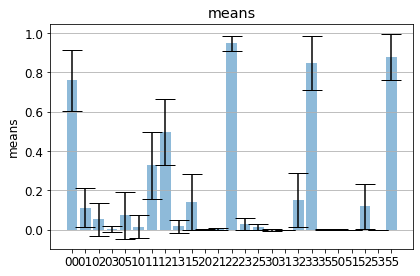

          0         1         2         3         5
0  0.758998  0.016381  0.000599  0.001300  0.000601
1  0.111836  0.326945  0.004519  0.000189  0.000147
2  0.052406  0.497639  0.949053  0.151320  0.119517
3  0.003364  0.017760  0.030629  0.846901  0.000153
5  0.073395  0.141276  0.015200  0.000290  0.879583
<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         5
0  0.156420  0.057738  0.001519  0.005073  0.003122
1  0.098741  0.167848  0.004844  0.001268  0.000985
2  0.084806  0.167030  0.037824  0.138020  0.115047
3  0.015829  0.033329  0.031711  0.137225  0.001027
5  0.117914  0.142456  0.014242  0.001944  0.115920
list of cohens kappa
[0.8650880429314103, 0.8159750022837553, 0.8325232636547539, 0.8774325519681557, 0.7585718148078356, 0.8634133491389245, 0.844987057409633, 0.9135974376858597, 0.820623940629438, 0.9198750955054313, 0.732360791022199, 0.9137502073312324, 0.5962477023515245, 0.6860102325234, 0.8232517911546587, 0.766570176164089, 0.8

<Figure size 432x288 with 0 Axes>

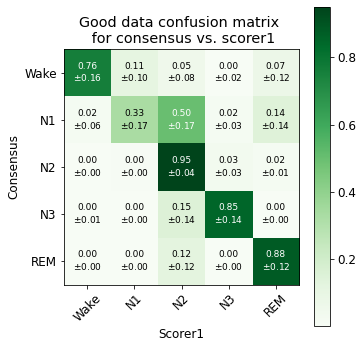

In [12]:
# Good data nights in cms and mean of each list for scorer1 and scorer5
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
list_of_nights = [12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]

# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()

# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')


# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('scorer1_'+i+'.txt', delimiter='\t')
# find all negative values
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    

    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'scorer'})

    # makeing confusion matrix for everz night 


    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['scorer']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')
    cmn_night = df_confusion_night


    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)
    df_scorers = df_scorers.append(df_scorer1, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
# counting mean of everz list
mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)


# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)



#making list of means and stds and two more list with labels and classes
means = [mean00, mean01, mean02, mean03, mean05, mean10, mean11, mean12, mean13, mean15, mean20, mean21, mean22, mean23, mean25, mean30, mean31, mean32, mean33, mean35, mean50, mean51, mean52, mean53, mean55, ]
stdevs = [stdev00, stdev01, stdev02, stdev03, stdev05, stdev10, stdev11, stdev12, stdev13, stdev15, stdev20, stdev21, stdev22, stdev23, stdev25, stdev30, stdev31, stdev32, stdev33, stdev35, stdev50, stdev51, stdev52, stdev53, stdev55, ]
labels = ['00', '01', '02', '03', '05', '10', '11', '12', '13', '15', '20', '21', '22', '23', '25', '30', '31', '32', '33', '35', '50', '51', '52', '53', '55', ]

class_list = ['Wake','N1','N2','N3','REM']
x_pos = np.arange(len(labels))
print (means)
print (stdevs)
# first plot, which is prettz bad
fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=stdevs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('means')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('means')
ax.yaxis.grid(True)

plt.tight_layout()

plt.show()
#makind and printing dataframe confusion matrrix of means just for us 
DataForConfusionMatrixMeanDataFrame = {'0': [mean00, mean01, mean02, mean03, mean05],
        '1': [mean10, mean11, mean12, mean13, mean15],
        '2': [mean20, mean21, mean22, mean23, mean25],
        '3': [mean30, mean31, mean32, mean33, mean35],
        '5': [mean50, mean51, mean52, mean53, mean55],
        }
ConfusionMatrixMeanDataFrame = pd.DataFrame(DataForConfusionMatrixMeanDataFrame, index=['0','1','2','3','5'])
print (ConfusionMatrixMeanDataFrame)
print (type(ConfusionMatrixMeanDataFrame))


#making and printing dataframe confusion matrrix of std just for us 
DataForConfusionMatrixStDevDataFrame = {'0': [stdev00, stdev01, stdev02, stdev03, stdev05],
        '1': [stdev10, stdev11, stdev12, stdev13, stdev15],
        '2': [stdev20, stdev21, stdev22, stdev23, stdev25],
        '3': [stdev30, stdev31, stdev32, stdev33, stdev35],
        '5': [stdev50, stdev51, stdev52, stdev53, stdev55],
        }
ConfusionMatrixStDevDataFrame = pd.DataFrame(DataForConfusionMatrixStDevDataFrame, index=['0','1','2','3','5'])

print (ConfusionMatrixStDevDataFrame)

DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]

# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
#function for plotting
def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=9,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Good data confusion matrix \n for consensus vs. scorer1")
    plt.rc('font', size=12) 
    plt.ylabel('Consensus')
    plt.xlabel('Scorer1')


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('Good_data_uncleaned_scorer5_vs_scorer1.png', bbox_inches='tight')

print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list) 



[0.816152801891679, 0.08364194069159744, 0.03657800913576693, 0.0015527950310559005, 0.04824046115503913, 0.014840894264013775, 0.5339624113168749, 0.36650313538560203, 0.0, 0.08469355903350913, 0.0007173556971863212, 0.012634289757054362, 0.9814408417933695, 0.001063794167920727, 0.004052759879720853, 0.0006211180124223603, 0.0031813361611876985, 0.46764469026309746, 0.5285528555632925, 0.0, 0.0004536185802170457, 0.0077195019524887, 0.09677241461391638, 0.0, 0.8733153344185953]
[0.15116114036137668, 0.09701340119553106, 0.06886943560918597, 0.010416465733694672, 0.08520292318384089, 0.04709515497306193, 0.1611738338571009, 0.15092756914754507, 0.0, 0.09725112758449912, 0.0019576245242908154, 0.01120921382871474, 0.016109693703912756, 0.0027450346456475974, 0.008213413351921063, 0.00416658629347787, 0.021341051747081757, 0.15901311764430845, 0.15494811952621795, 0.0, 0.002222490670366857, 0.022301443469669772, 0.09570258127227114, 0.0, 0.16446286270244537]


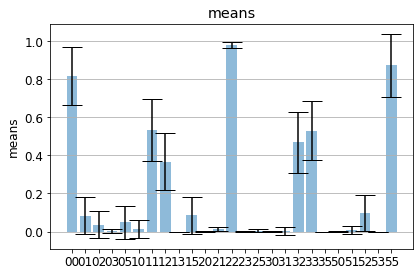

          0         1         2         3         5
0  0.816153  0.014841  0.000717  0.000621  0.000454
1  0.083642  0.533962  0.012634  0.003181  0.007720
2  0.036578  0.366503  0.981441  0.467645  0.096772
3  0.001553  0.000000  0.001064  0.528553  0.000000
5  0.048240  0.084694  0.004053  0.000000  0.873315
<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         5
0  0.151161  0.047095  0.001958  0.004167  0.002222
1  0.097013  0.161174  0.011209  0.021341  0.022301
2  0.068869  0.150928  0.016110  0.159013  0.095703
3  0.010416  0.000000  0.002745  0.154948  0.000000
5  0.085203  0.097251  0.008213  0.000000  0.164463
list of cohens kappa
[0.7517869732100892, 0.7392174299688751, 0.8418724842220344, 0.8683059707403175, 0.7641809783397709, 0.8192816773909427, 0.8199725023541724, 0.9362756083801517, 0.8022788015192011, 0.8818097253215988, 0.7683575989782887, 0.8427133509042988, 0.6839604094351031, 0.7401454736657611, 0.637384464546917, 0.758222340762473

<Figure size 432x288 with 0 Axes>

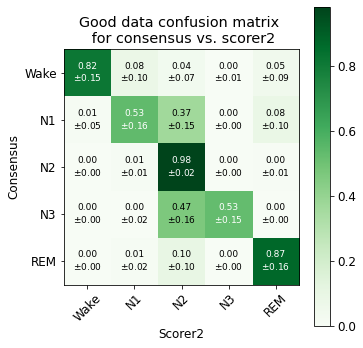

In [13]:
# Good data nights in cms and mean of each list for scorer2 and scorer5
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
list_of_nights = [12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]

# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()

# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('scorer2_'+i+'.txt', delimiter='\t')
# find all negative values
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    

    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'scorer'})

    # makeing confusion matrix for everz night 


    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['scorer']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')
    cmn_night = df_confusion_night


    # append everz cell of confusion matrix to corresponding list
    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)
    df_scorers = df_scorers.append(df_scorer1, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
# counting mean of everz list
mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)


# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)


#making list of means and stds and two more list with labels and classes
means = [mean00, mean01, mean02, mean03, mean05, mean10, mean11, mean12, mean13, mean15, mean20, mean21, mean22, mean23, mean25, mean30, mean31, mean32, mean33, mean35, mean50, mean51, mean52, mean53, mean55, ]
stdevs = [stdev00, stdev01, stdev02, stdev03, stdev05, stdev10, stdev11, stdev12, stdev13, stdev15, stdev20, stdev21, stdev22, stdev23, stdev25, stdev30, stdev31, stdev32, stdev33, stdev35, stdev50, stdev51, stdev52, stdev53, stdev55, ]
labels = ['00', '01', '02', '03', '05', '10', '11', '12', '13', '15', '20', '21', '22', '23', '25', '30', '31', '32', '33', '35', '50', '51', '52', '53', '55', ]

class_list = ['Wake','N1','N2','N3','REM']
x_pos = np.arange(len(labels))
print (means)
print (stdevs)
# first plot, which is prettz bad
fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=stdevs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('means')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('means')
ax.yaxis.grid(True)

plt.tight_layout()

plt.show()
#makind and printing dataframe confusion matrrix of means just for us 
DataForConfusionMatrixMeanDataFrame = {'0': [mean00, mean01, mean02, mean03, mean05],
        '1': [mean10, mean11, mean12, mean13, mean15],
        '2': [mean20, mean21, mean22, mean23, mean25],
        '3': [mean30, mean31, mean32, mean33, mean35],
        '5': [mean50, mean51, mean52, mean53, mean55],
        }
ConfusionMatrixMeanDataFrame = pd.DataFrame(DataForConfusionMatrixMeanDataFrame, index=['0','1','2','3','5'])
print (ConfusionMatrixMeanDataFrame)
print (type(ConfusionMatrixMeanDataFrame))


#making and printing dataframe confusion matrrix of std just for us 
DataForConfusionMatrixStDevDataFrame = {'0': [stdev00, stdev01, stdev02, stdev03, stdev05],
        '1': [stdev10, stdev11, stdev12, stdev13, stdev15],
        '2': [stdev20, stdev21, stdev22, stdev23, stdev25],
        '3': [stdev30, stdev31, stdev32, stdev33, stdev35],
        '5': [stdev50, stdev51, stdev52, stdev53, stdev55],
        }
ConfusionMatrixStDevDataFrame = pd.DataFrame(DataForConfusionMatrixStDevDataFrame, index=['0','1','2','3','5'])

print (ConfusionMatrixStDevDataFrame)

DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]

# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
#function for plotting
def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=9,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Good data confusion matrix \n for consensus vs. scorer2")
    plt.rc('font', size=12) 
    plt.ylabel('Consensus')
    plt.xlabel('Scorer2')


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('Good_data_uncleaned_scorer5_vs_scorer2.png', bbox_inches='tight')

print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list) 



[0.9366520492014613, 0.05569865105921049, 0.003339730921252661, 0.0, 0.0043095688180754335, 0.2754903653479596, 0.5821451630300475, 0.10428961235008681, 0.001280397936624908, 0.0367944613352811, 0.01030781986630641, 0.020988334213767036, 0.840390352180402, 0.06267905622803147, 0.06563443751149299, 0.012379577435723172, 0.0076787558129010666, 0.050576987691975946, 0.9208087756257954, 0.008400623930498938, 0.009998955742701918, 0.014653506493682182, 0.004615074410156758, 0.0, 0.9707324633534592]
[0.09035854590121885, 0.08943167887367051, 0.013550840696669675, 0.0, 0.015130946107200435, 0.10931960503166675, 0.15156512061048297, 0.10369812023925114, 0.006076830229431488, 0.0566169089052148, 0.005538133265732762, 0.011759186106548771, 0.05884766077497793, 0.04151145648400498, 0.04444350743162801, 0.012858072718105979, 0.009271980014743757, 0.06425362074748459, 0.07677783764472129, 0.028539674574542838, 0.008028005082360202, 0.02356210722019661, 0.011656654293946389, 0.0, 0.02845600248058846

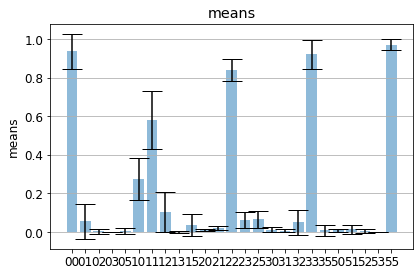

          0         1         2         3         5
0  0.936652  0.275490  0.010308  0.012380  0.009999
1  0.055699  0.582145  0.020988  0.007679  0.014654
2  0.003340  0.104290  0.840390  0.050577  0.004615
3  0.000000  0.001280  0.062679  0.920809  0.000000
5  0.004310  0.036794  0.065634  0.008401  0.970732
<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         5
0  0.090359  0.109320  0.005538  0.012858  0.008028
1  0.089432  0.151565  0.011759  0.009272  0.023562
2  0.013551  0.103698  0.058848  0.064254  0.011657
3  0.000000  0.006077  0.041511  0.076778  0.000000
5  0.015131  0.056617  0.044444  0.028540  0.028456
list of cohens kappa
[0.8152483264520785, 0.729537620296488, 0.787518246293923, 0.8585359935292531, 0.833698263945744, 0.8151360922961604, 0.7261112532135626, 0.759768009050093, 0.7180631850148982, 0.869801134484544, 0.7962712961206753, 0.8929750354243133, 0.8383378682871239, 0.8371119133574008, 0.8452539210944517, 0.7731502570443157, 0

<Figure size 432x288 with 0 Axes>

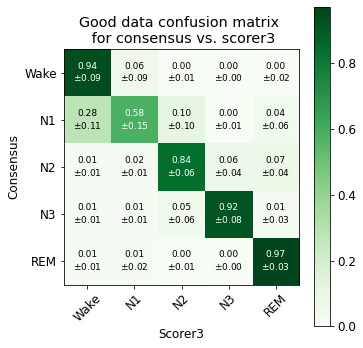

In [14]:
# Good data nights in cms and mean of each list for scorer3 and scorer5
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
list_of_nights = [12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]

# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()

# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('scorer3_'+i+'.txt', delimiter='\t')
# find all negative values
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    

    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'scorer'})

    # makeing confusion matrix for everz night 


    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['scorer']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')
    cmn_night = df_confusion_night


    # append everz cell of confusion matrix to corresponding list
    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)
    df_scorers = df_scorers.append(df_scorer1, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
# counting mean of everz list
mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)


# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)



#making list of means and stds and two more list with labels and classes
means = [mean00, mean01, mean02, mean03, mean05, mean10, mean11, mean12, mean13, mean15, mean20, mean21, mean22, mean23, mean25, mean30, mean31, mean32, mean33, mean35, mean50, mean51, mean52, mean53, mean55, ]
stdevs = [stdev00, stdev01, stdev02, stdev03, stdev05, stdev10, stdev11, stdev12, stdev13, stdev15, stdev20, stdev21, stdev22, stdev23, stdev25, stdev30, stdev31, stdev32, stdev33, stdev35, stdev50, stdev51, stdev52, stdev53, stdev55, ]
labels = ['00', '01', '02', '03', '05', '10', '11', '12', '13', '15', '20', '21', '22', '23', '25', '30', '31', '32', '33', '35', '50', '51', '52', '53', '55', ]

class_list = ['Wake','N1','N2','N3','REM']
x_pos = np.arange(len(labels))
print (means)
print (stdevs)
# first plot, which is prettz bad
fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=stdevs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('means')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('means')
ax.yaxis.grid(True)

plt.tight_layout()

plt.show()
#makind and printing dataframe confusion matrrix of means just for us 
DataForConfusionMatrixMeanDataFrame = {'0': [mean00, mean01, mean02, mean03, mean05],
        '1': [mean10, mean11, mean12, mean13, mean15],
        '2': [mean20, mean21, mean22, mean23, mean25],
        '3': [mean30, mean31, mean32, mean33, mean35],
        '5': [mean50, mean51, mean52, mean53, mean55],
        }
ConfusionMatrixMeanDataFrame = pd.DataFrame(DataForConfusionMatrixMeanDataFrame, index=['0','1','2','3','5'])
print (ConfusionMatrixMeanDataFrame)
print (type(ConfusionMatrixMeanDataFrame))

#making and printing dataframe confusion matrrix of std just for us 
DataForConfusionMatrixStDevDataFrame = {'0': [stdev00, stdev01, stdev02, stdev03, stdev05],
        '1': [stdev10, stdev11, stdev12, stdev13, stdev15],
        '2': [stdev20, stdev21, stdev22, stdev23, stdev25],
        '3': [stdev30, stdev31, stdev32, stdev33, stdev35],
        '5': [stdev50, stdev51, stdev52, stdev53, stdev55],
        }
ConfusionMatrixStDevDataFrame = pd.DataFrame(DataForConfusionMatrixStDevDataFrame, index=['0','1','2','3','5'])

print (ConfusionMatrixStDevDataFrame)
DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]

# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
#function for plotting
def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=9,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Good data confusion matrix \n for consensus vs. scorer3")
    plt.rc('font', size=12) 
    plt.ylabel('Consensus')
    plt.xlabel('Scorer3')


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('Good_data_uncleaned_scorer5_vs_scorer3.png', bbox_inches='tight')

print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list) 



[0.9788246320855016, 0.011839775970210754, 0.009335591944287597, 0.0, 0.0, 0.48430359766559017, 0.4195845661168618, 0.0857632250651612, 0.0046559704597462035, 0.005692640692640694, 0.020750615604661526, 0.012268638199870304, 0.8048245816782881, 0.15209184090959044, 0.010064323607589522, 0.0194243590820723, 0.0017325022474423484, 0.003393963427280681, 0.9752766424619762, 0.0001725327812284334, 0.03625602470592706, 0.03945678227377661, 0.07423814148477036, 0.0, 0.8500490515355258]
[0.05686573197705904, 0.05174766943337495, 0.02619166647223205, 0.0, 0.0, 0.10871416632904403, 0.11034674491700808, 0.08209067190734531, 0.016257623699170307, 0.0195524921573749, 0.008132925072650527, 0.005533332055154747, 0.05764093894889695, 0.05397644852172999, 0.01099842435130154, 0.01779430802030375, 0.004323928514426437, 0.006651459979117146, 0.01906213163454105, 0.0011573850815216303, 0.018898874953935774, 0.02679895958619909, 0.044486608247548146, 0.0, 0.0556737039376621]


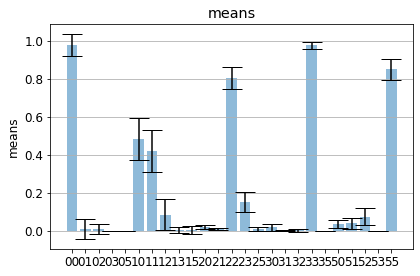

          0         1         2         3         5
0  0.978825  0.484304  0.020751  0.019424  0.036256
1  0.011840  0.419585  0.012269  0.001733  0.039457
2  0.009336  0.085763  0.804825  0.003394  0.074238
3  0.000000  0.004656  0.152092  0.975277  0.000000
5  0.000000  0.005693  0.010064  0.000173  0.850049
<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         5
0  0.056866  0.108714  0.008133  0.017794  0.018899
1  0.051748  0.110347  0.005533  0.004324  0.026799
2  0.026192  0.082091  0.057641  0.006651  0.044487
3  0.000000  0.016258  0.053976  0.019062  0.000000
5  0.000000  0.019552  0.010998  0.001157  0.055674
list of cohens kappa
[0.7446338443957718, 0.7642182238587472, 0.7556952979848506, 0.7128284923928077, 0.7787950811201818, 0.7624796155067464, 0.8358400147654339, 0.8061518381343646, 0.7140410140378273, 0.8297830170406173, 0.7350642099385818, 0.7815284708030332, 0.796131730266597, 0.7809649020414934, 0.7687247565920506, 0.773980790054704

<Figure size 432x288 with 0 Axes>

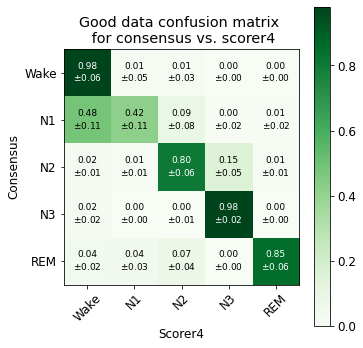

In [15]:
# Good data nights in cms and mean of each list for scorer4 and scorer5
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
list_of_nights = [12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]

# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()

# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')


# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('scorer4_'+i+'.txt', delimiter='\t')
# find all negative values
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    

    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'scorer'})

    # makeing confusion matrix for everz night 


    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['scorer']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')
    cmn_night = df_confusion_night


    # append everz cell of confusion matrix to corresponding list
    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)
    df_scorers = df_scorers.append(df_scorer1, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
# counting mean of everz list
mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)


# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)



#making list of means and stds and two more list with labels and classes
means = [mean00, mean01, mean02, mean03, mean05, mean10, mean11, mean12, mean13, mean15, mean20, mean21, mean22, mean23, mean25, mean30, mean31, mean32, mean33, mean35, mean50, mean51, mean52, mean53, mean55, ]
stdevs = [stdev00, stdev01, stdev02, stdev03, stdev05, stdev10, stdev11, stdev12, stdev13, stdev15, stdev20, stdev21, stdev22, stdev23, stdev25, stdev30, stdev31, stdev32, stdev33, stdev35, stdev50, stdev51, stdev52, stdev53, stdev55, ]
labels = ['00', '01', '02', '03', '05', '10', '11', '12', '13', '15', '20', '21', '22', '23', '25', '30', '31', '32', '33', '35', '50', '51', '52', '53', '55', ]

class_list = ['Wake','N1','N2','N3','REM']
x_pos = np.arange(len(labels))
print (means)
print (stdevs)
# first plot, which is prettz bad
fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=stdevs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('means')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('means')
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('.png')
plt.show()
#makind and printing dataframe confusion matrrix of means just for us 
DataForConfusionMatrixMeanDataFrame = {'0': [mean00, mean01, mean02, mean03, mean05],
        '1': [mean10, mean11, mean12, mean13, mean15],
        '2': [mean20, mean21, mean22, mean23, mean25],
        '3': [mean30, mean31, mean32, mean33, mean35],
        '5': [mean50, mean51, mean52, mean53, mean55],
        }
ConfusionMatrixMeanDataFrame = pd.DataFrame(DataForConfusionMatrixMeanDataFrame, index=['0','1','2','3','5'])
print (ConfusionMatrixMeanDataFrame)
print (type(ConfusionMatrixMeanDataFrame))


#making and printing dataframe confusion matrrix of std just for us 
DataForConfusionMatrixStDevDataFrame = {'0': [stdev00, stdev01, stdev02, stdev03, stdev05],
        '1': [stdev10, stdev11, stdev12, stdev13, stdev15],
        '2': [stdev20, stdev21, stdev22, stdev23, stdev25],
        '3': [stdev30, stdev31, stdev32, stdev33, stdev35],
        '5': [stdev50, stdev51, stdev52, stdev53, stdev55],
        }
ConfusionMatrixStDevDataFrame = pd.DataFrame(DataForConfusionMatrixStDevDataFrame, index=['0','1','2','3','5'])

print (ConfusionMatrixStDevDataFrame)
DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]

# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
#function for plotting
def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=9,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Good data confusion matrix \n for consensus vs. scorer4")
    plt.rc('font', size=12) 
    plt.ylabel('Consensus')
    plt.xlabel('Scorer4')


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('Good_data_uncleaned_scorer5_vs_scorer4.png', bbox_inches='tight')

print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list) 

